# Linear regression Assignment

BoomBikes, A US bike-sharing provider  has recently suffered considerable dips in their revenues due to the Corona pandemic.They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [120]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [121]:
import warnings
warnings.filterwarnings('ignore')

## Reading and undestanding the data

In [122]:
# storing the dataframe in a variable 'bike'
bike = pd.read_csv('day.csv')

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [123]:
#Target-  'cnt' is a continuous variable, that is why we can do regression here.

In [124]:
# just copying our datframe into df for later usage
df = bike 

In [125]:
# checking the shape of the dataframe bike
bike.shape

(730, 16)

In [126]:
#checking for duplicates
dupli = bike.copy()
dupli.drop_duplicates(inplace = True)
dupli.shape

(730, 16)

Shape is unchanged - impying that there is no duplicates in the dataset

In [127]:
# checking for missing values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Luckily we don't have any missing values

# Data Preparation

#### 1. Dropping irrelevant columns

Column instant is a an unnecessory column since it is just a record index representing each instance(all values are unique)

In [128]:
bike.drop('instant',axis = 1, inplace =  True)

#### 2. Dropping unimportant/reduntant variables

    1.In the dataframe there are two variables temp and atemp which represents the temeperature in celsius.The only difference is that the former one is directly measured and the second one is the feeling temperature.So these two variables might be highly correlated with each other

In [129]:
# checking the correlation between temp and atemp
bike.temp.corr(bike.atemp)

0.9916961786905648

<AxesSubplot:xlabel='temp', ylabel='atemp'>

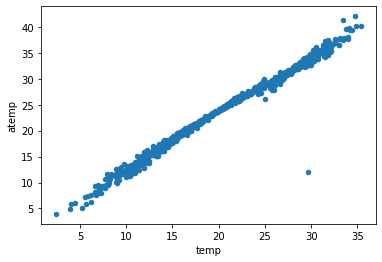

In [130]:
# Scatter plot of 'temp' vs 'atemp'
bike.plot.scatter('temp','atemp')

In [131]:
#Since temp and atemp can cause multicollinearity, removing atemp
bike.drop('atemp',axis = 1, inplace = True)

    2.Column dteday can be removed as all the possible information from date has been extracted into values in other columns(yr,weekday,mnth)
    

In [132]:
bike.drop('dteday',axis = 1, inplace = True)

    3. Removing columns casual(count of casual users) and registered: count of registered users) because our target variable cnt is a sum of these two columns.So If keep these columns in the model then these two columns will be enough to explain/predict the values of cnt. So in order to avoid that we need drop these columns
    

In [133]:
bike.drop(['casual','registered'],axis = 1, inplace = True)

#### 3.Understanding the variable types

In [134]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [135]:
# Binary type - yr,holiday,workingday
# Categorical type - season,mnth,weekday,weathersit
# Numerical type - temp,hum,windspeed,cnt

#### 4.Converting the categorical variables into correct format

In [136]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [137]:
# some of the categorical variables have dtype as int6/float64
# converting their dtype into 'object'

bike[['season','mnth','weekday','weathersit']] = bike[['season','mnth','weekday','weathersit']].astype('object')

    a. changing the values in season and weathersit to categorical strings provided in  the data dictionary

In [138]:
#### Season

In [139]:
#checking the values and their count in 'season'
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [140]:
# replacing the values with names given
bike.season = bike.season.replace([1,2,3,4],['spring', 'summer','fall','winter'])

In [141]:
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [142]:
#### weathersit

In [143]:
# checking the values and their count in 'weathersit'
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [144]:
# replacing the values with names given
bike.weathersit = bike.weathersit.replace([1,2,3],['clear/Partly_cloudy','mist/Cloudy','light-Snow/Rain/Storm'])

In [145]:
bike.weathersit.value_counts()

clear/Partly_cloudy      463
mist/Cloudy              246
light-Snow/Rain/Storm     21
Name: weathersit, dtype: int64

In [146]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [147]:
# Getting dummy variables for the categorical nominal variables(season.weathersit,mnth,weekday)
#and dropping one dummy as the other dummies will take care of the dropping dummy's information.
bike = pd.get_dummies(bike,drop_first = True)

In [148]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                730 non-null    int64  
 1   holiday                           730 non-null    int64  
 2   workingday                        730 non-null    int64  
 3   temp                              730 non-null    float64
 4   hum                               730 non-null    float64
 5   windspeed                         730 non-null    float64
 6   cnt                               730 non-null    int64  
 7   season_spring                     730 non-null    uint8  
 8   season_summer                     730 non-null    uint8  
 9   season_winter                     730 non-null    uint8  
 10  mnth_2                            730 non-null    uint8  
 11  mnth_3                            730 non-null    uint8  
 12  mnth_4  

#### Dummy Variables for season
we don't need four columns. We can drop the 'fall' column, as the season can be identified with just the last three columns where — 
 - `000` will correspond to `fall`
 - `001` will correspond to `winter`
 - `010` will correspond to `summer`
 - `100` will correspond to `spring`

   #### Dummy Variables for weathersit 
- `00` will correspond to `clear/Partly_cloudy`
- `01` will correspond to `mist/Cloudy`
- `10` will correspond to `light-Snow/Rain/Storm`

#### Dummy variables for Weekday and Mnth
we have created dummies for each weekday and first column '0'th weekday has been removed,since we have all the information directly or derived from the  values of rest of the columns.

similarly dummies for mnth has been created and the first column (first month) has been removed

# EDA

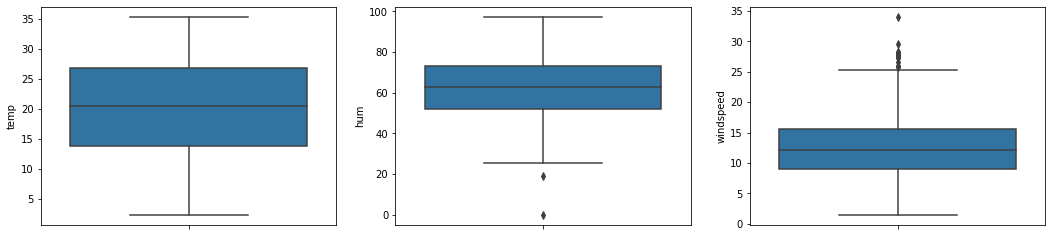

In [149]:
# Drawing box plots for indepent variables with continuous values
cols = ['temp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,3,i)
    sns.boxplot(y=col, data=bike)
    i+=1

In the boxplots of 'hum' and 'windspeed' there are very few data point outside fences, however these are natural points and seems to be part of it. So I do not consider them as outliers. So we are good with not having any outliers in the dataset

<AxesSubplot:xlabel='yr'>

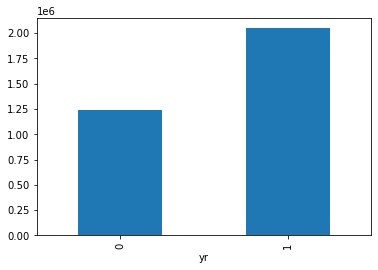

In [150]:
#plotting total count of rental bikes over years
bike.groupby('yr').cnt.sum().plot.bar()

The demand for rental bikes have increased over years

<function matplotlib.pyplot.show(close=None, block=None)>

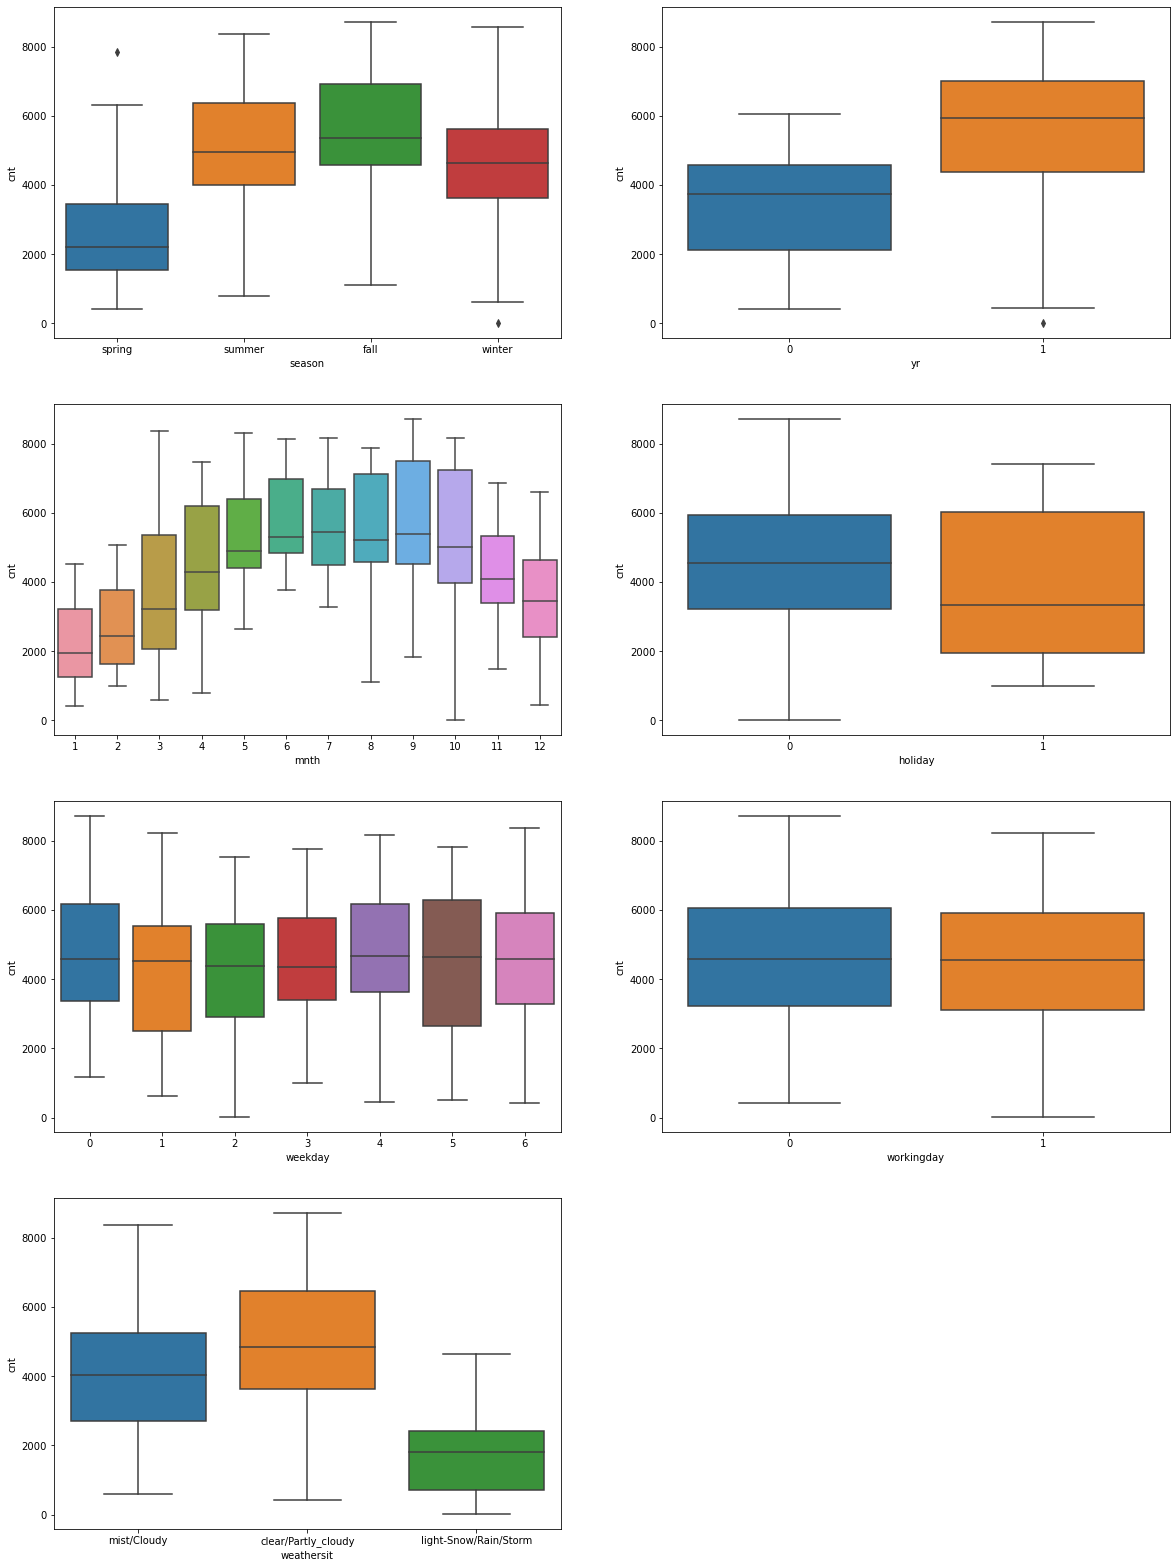

In [151]:
# visualising the categorical variables (before dummy creation) against our target variable 'cnt'
plt.figure(figsize=[20,28])

plt.subplot(4,2,1)
sns.boxplot(df.season,df.cnt)   #season ~ cnt

plt.subplot(4,2,2)
sns.boxplot(df.yr,df.cnt)       # yr ~ cnt

plt.subplot(4,2,3)
sns.boxplot(df.mnth,df.cnt)     # mnth ~ cnt

plt.subplot(4,2,4)
sns.boxplot(df.holiday,df.cnt)  # holiday ~ cnt

plt.subplot(4,2,5)
sns.boxplot(df.weekday,df.cnt)   # weekday ~ cnt

plt.subplot(4,2,6)
sns.boxplot(df.workingday,df.cnt) # workingday ~ cnt

plt.subplot(4,2,7)
sns.boxplot(df.weathersit,df.cnt) # weathersit ~ cnt

plt.show

- Highest demand for rental bikes are during fall and least during spring
- More people rented bike in 2019 than in 2018
- Demand for bikes increases from jan to june but later from september onwards it decreases.
- During holidays the demand is less
- The demand for bikes is more or less same for all the weekdays
- During clear weather situation the demand is high and very less during light snow/storm/rain
- During september (9th month) the bike sharing is at the peak and in the beginning and ending of the year it is least.

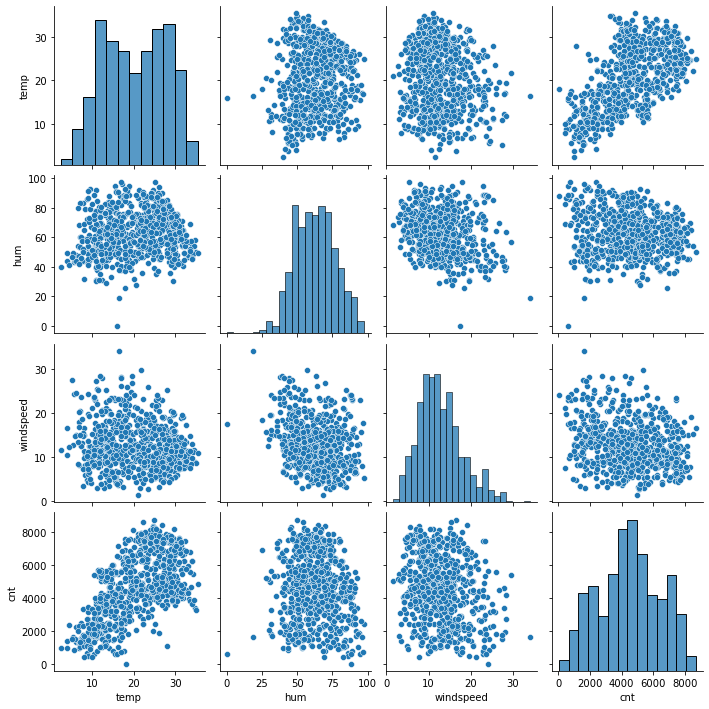

In [152]:
#### Analysis of numerical variables
# Analysis -continuous Nmerical variables
# creating a variable 'num_Var' chich contains the names of numerical variables
#and drawing a pairplot of them

num_var = ['temp','hum','windspeed','cnt']
sns.pairplot(bike[num_var])
plt.show()

- Temp seems to have a clear linear relationship with our target variable 'cnt'

<Figure size 1440x1080 with 0 Axes>

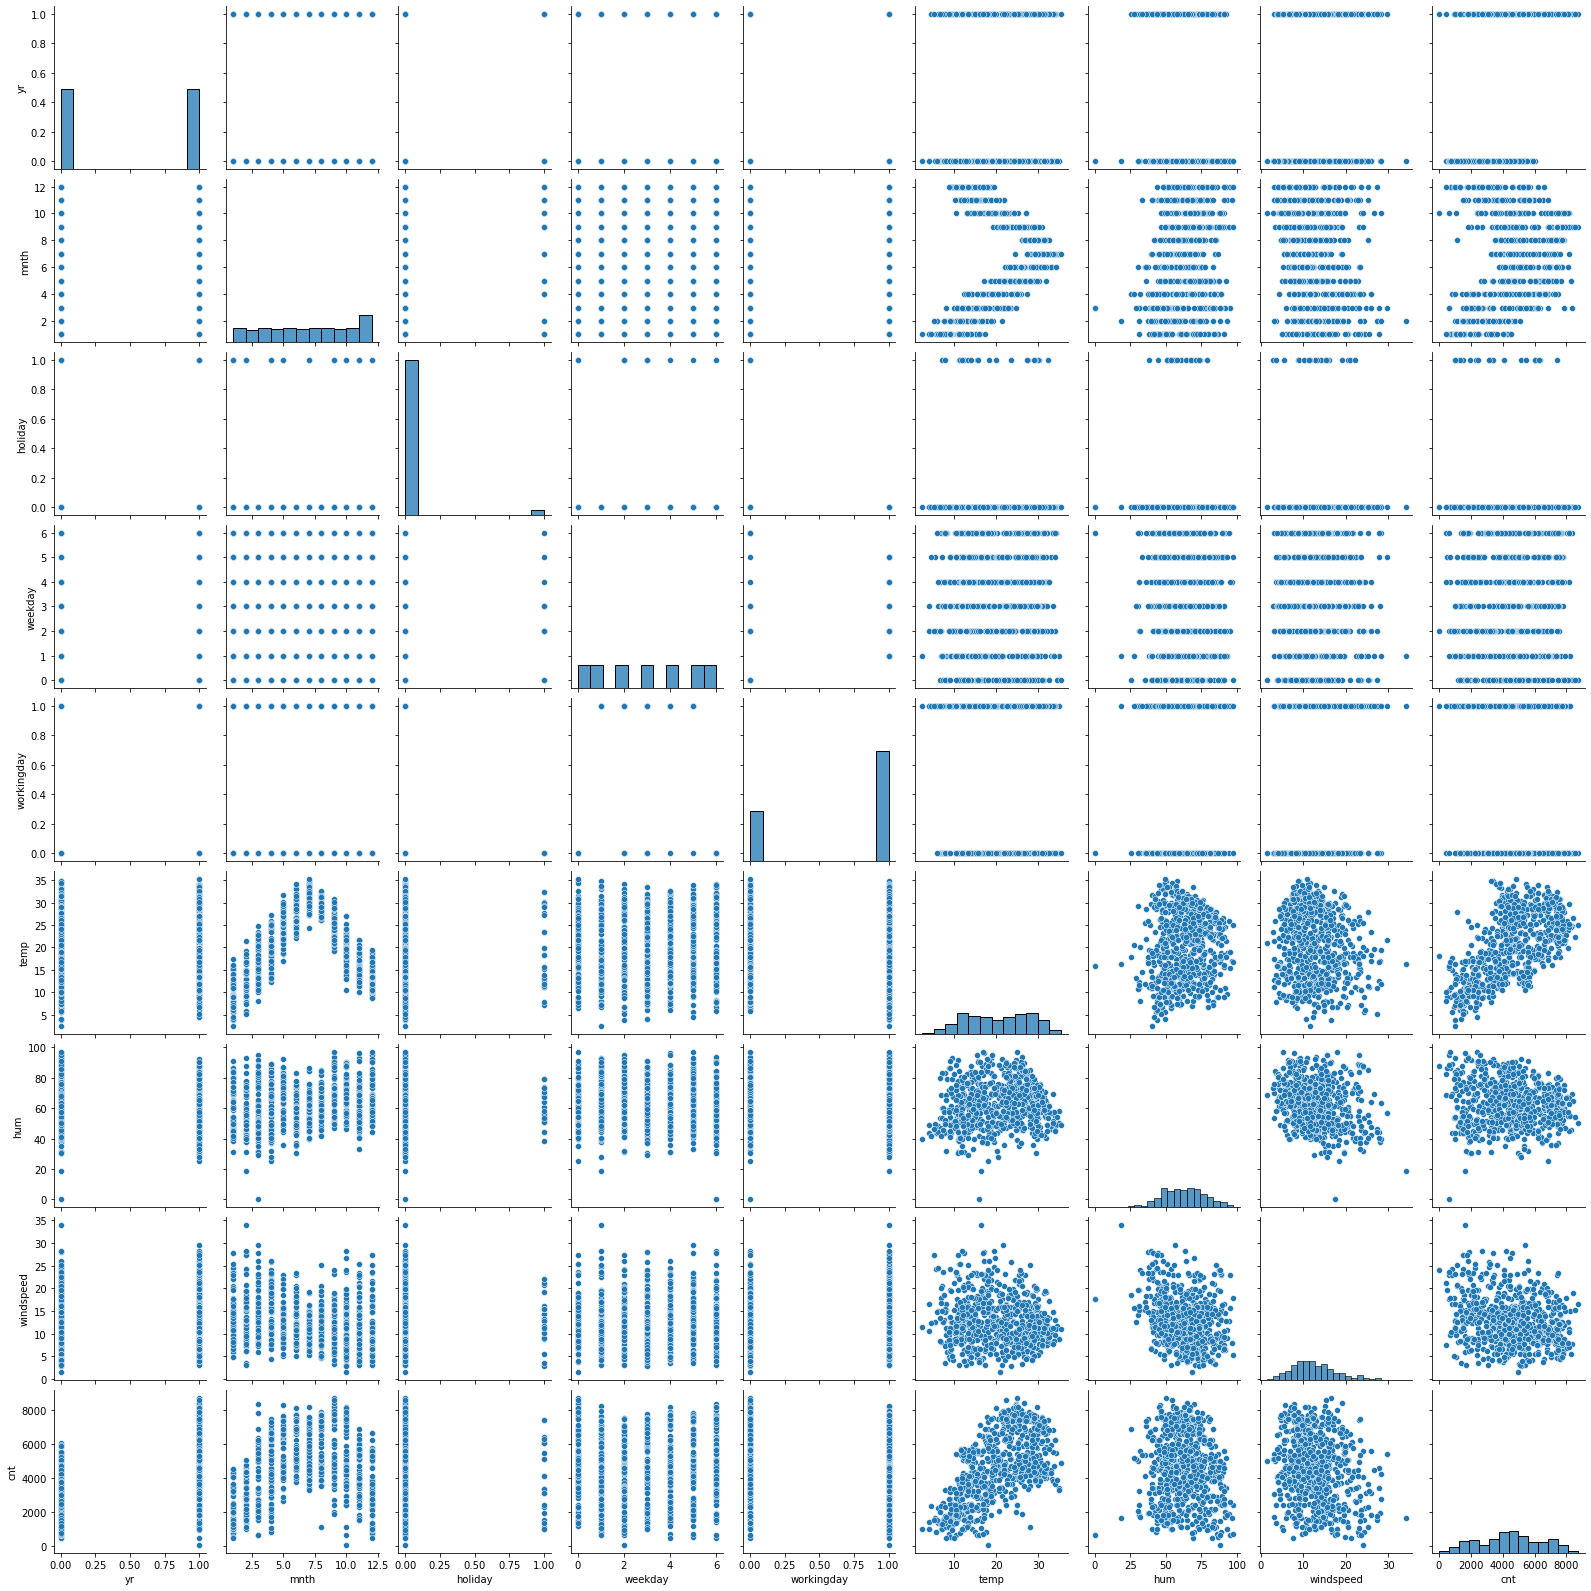

In [153]:
# considering all binary +numerical variables
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()



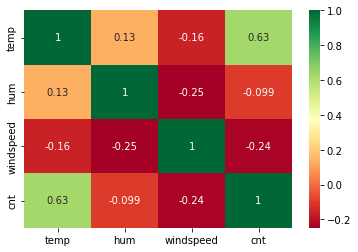

In [154]:
# let's check the correlation coefficients between the continuous variables
sns.heatmap(bike[['temp','hum','windspeed','cnt']].corr(), cmap='RdYlGn', annot = True)
plt.show()



- Temp is positvely correlated with our target variable 'cnt' with a value of 0.63
- Hum has very less correlation with 'cnt' (0.13)

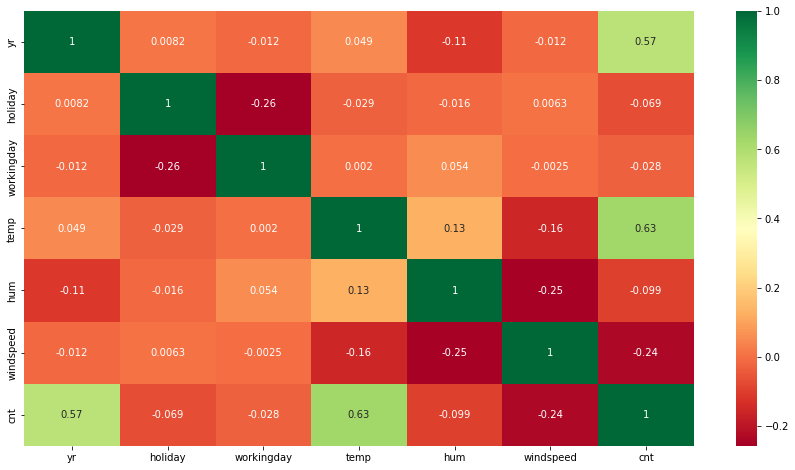

In [155]:
# let's have a look at the correlation coefficients of all the variables(binary+numerical) with each other
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True)
plt.show()

- Variable yr has a positive correlation with target variable with a value of 0.57
- variable 'workingday' is poorly correlated with cnt (-0.028)

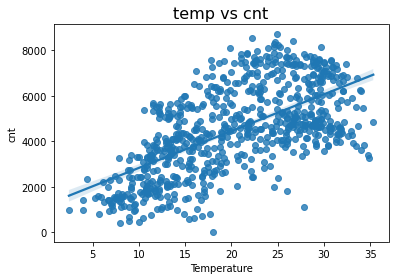

In [156]:
#let's plot a regplot of temp vs cnt
sns.regplot(data=bike,y="cnt",x="temp")
plt.title("temp vs cnt",fontsize=16)
plt.xlabel("Temperature")
plt.show()

Temperature seems to positevely affect total count of bikes rented 

# Model building

1.  Splitting the Data into Training and Testing Sets

In [157]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [158]:
#splitting the dataset into train(70%) and test(30%)
np.random.seed(0)
df_train,df_test = train_test_split(bike, train_size = 0.7,test_size = 0.3, random_state = 100)

In [159]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light-Snow/Rain/Storm,weathersit_mist/Cloudy
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [160]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_light-Snow/Rain/Storm', 'weathersit_mist/Cloudy'],
      dtype='object')

2. Rescaling the Features 

In [161]:
# importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()

In [162]:
# numerical type columns (without binary/dummy variables)
non_bool = ['temp','hum','windspeed','cnt']

In [163]:
# Applying scaler() to 'non_bool' 
#fitting on data
df_train[non_bool] = scaler.fit_transform(df_train[non_bool])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light-Snow/Rain/Storm,weathersit_mist/Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [164]:
df_train.describe() # no values are outside the range

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light-Snow/Rain/Storm,weathersit_mist/Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

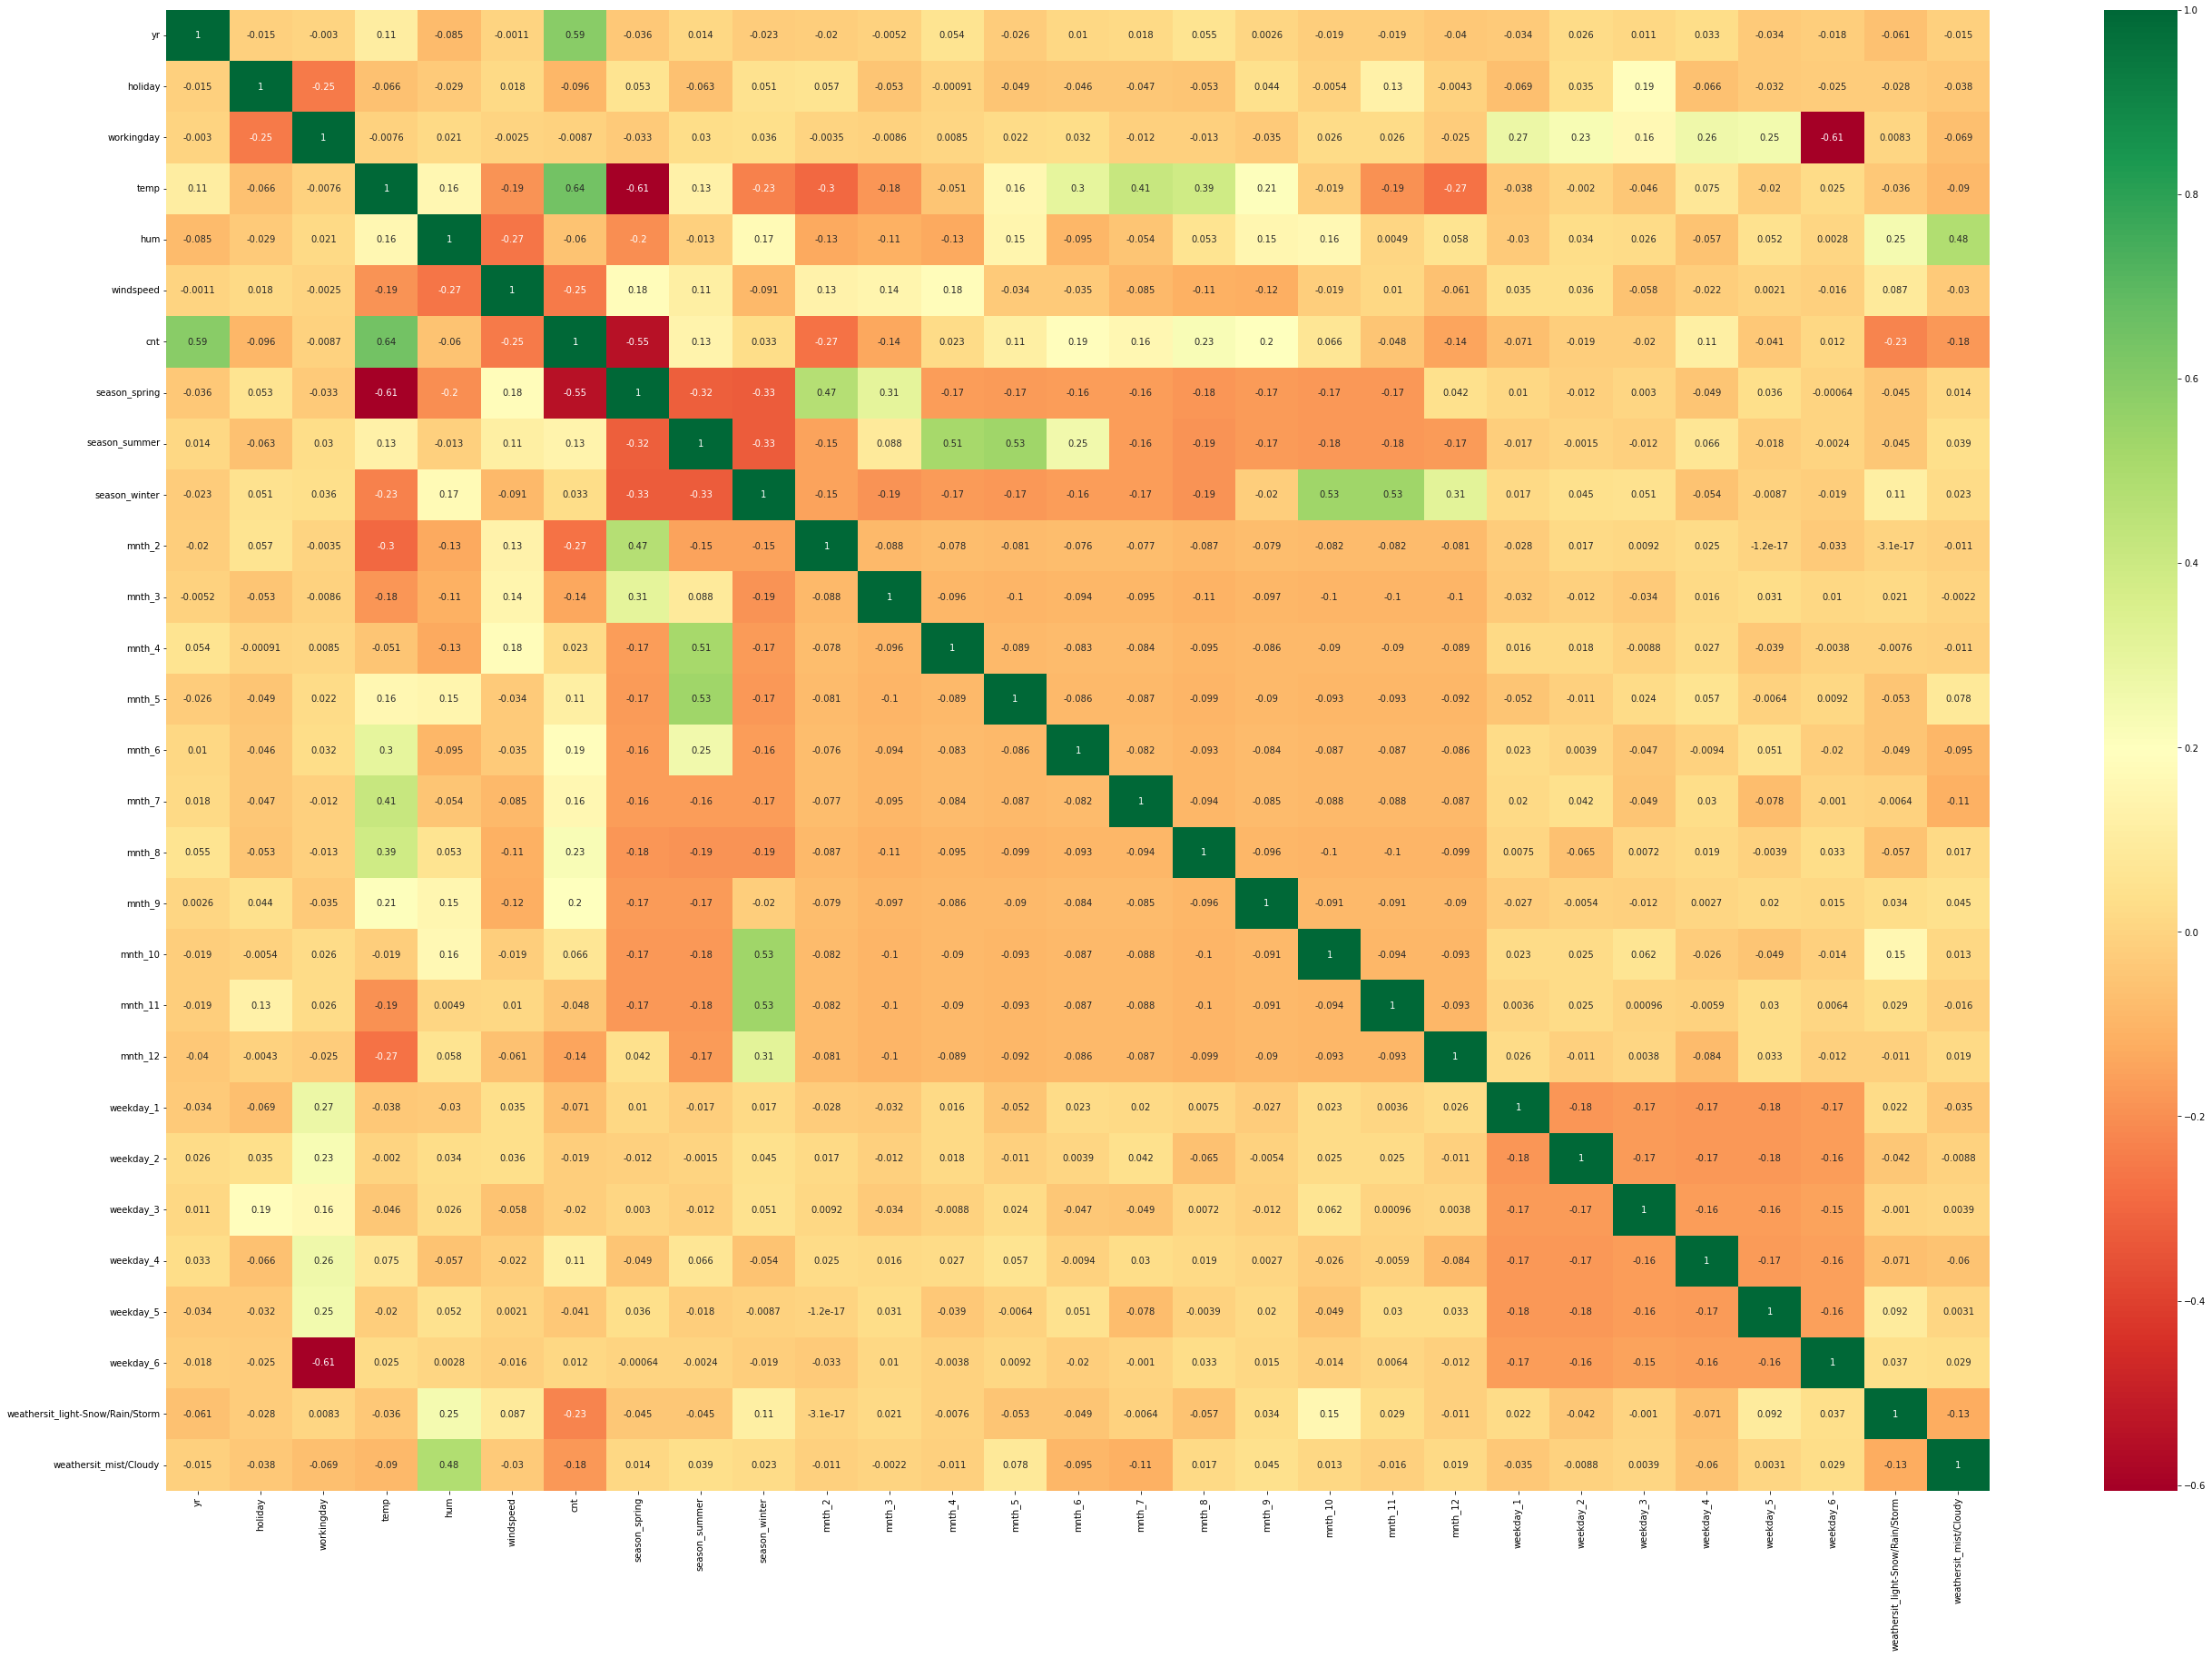

In [165]:
#heatmap of corelation coefficients of variables in training dataset

plt.figure(figsize=(45,30))
sns.heatmap(df_train.corr(),annot = True , cmap = 'RdYlGn')

temp and yr seems to have good correlations with our targe variable cnt

3. Dividing into X and Y sets for the model building

In [166]:
y_train = df_train.pop('cnt')
X_train = df_train 

In [167]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light-Snow/Rain/Storm,weathersit_mist/Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


let's import RFE and LinearRegression libraries from sklearn for implementing Linear Regression using Recurssive feature elimination

In [168]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [169]:
X_train.shape

(510, 28)

we have 28 varibles in X_train,since it is not feasible to use all the variables, let's consider 15
variables to start with.

In [170]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [171]:
#columns,wether they have been chosen or not, rank
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 11),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', False, 8),
 ('weekday_2', False, 9),
 ('weekday_3', False, 7),
 ('weekday_4', False, 5),
 ('weekday_5', False, 6),
 ('weekday_6', False, 14),
 ('weathersit_light-Snow/Rain/Storm', True, 1),
 ('weathersit_mist/Cloudy', True, 1)]

In [172]:
#chosen columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_3', 'mnth_5', 'mnth_8',
       'mnth_9', 'mnth_10', 'weathersit_light-Snow/Rain/Storm',
       'weathersit_mist/Cloudy'],
      dtype='object')

In [173]:
# not chosen
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [174]:
#Function to build a model using statsmodel api
import statsmodels.api as sm
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [175]:
#Function to calculate VIFs and print them 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [176]:
#building first model from rfe chosen columns
#model_1
build_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          2.95e-189
Time:                        05:39:56   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [177]:
# R squared -  0.846 -> 84% of the variation in 'cnt' can be explained by these 15 variables
# mnth 5 and season_spring are not significant in this model as their p value is above 0.05.
# Holiday,hum, windspeed,season_spring,weathersit_light-Snow/Rain/Storm  and weathersit_mist/Cloudy  have negative slope


In [178]:
# looking at the VIF
get_vif(col)

                            Features    VIF
3                                hum  29.50
2                               temp  15.39
4                          windspeed   4.77
5                      season_spring   4.72
7                      season_winter   4.33
6                      season_summer   3.85
14            weathersit_mist/Cloudy   2.29
0                                 yr   2.10
10                            mnth_8   1.80
9                             mnth_5   1.64
12                           mnth_10   1.61
11                            mnth_9   1.49
8                             mnth_3   1.34
13  weathersit_light-Snow/Rain/Storm   1.27
1                            holiday   1.05


In [179]:
# hum and temp have way high VIF values - impying the presence of multicollinearity issue

<AxesSubplot:>

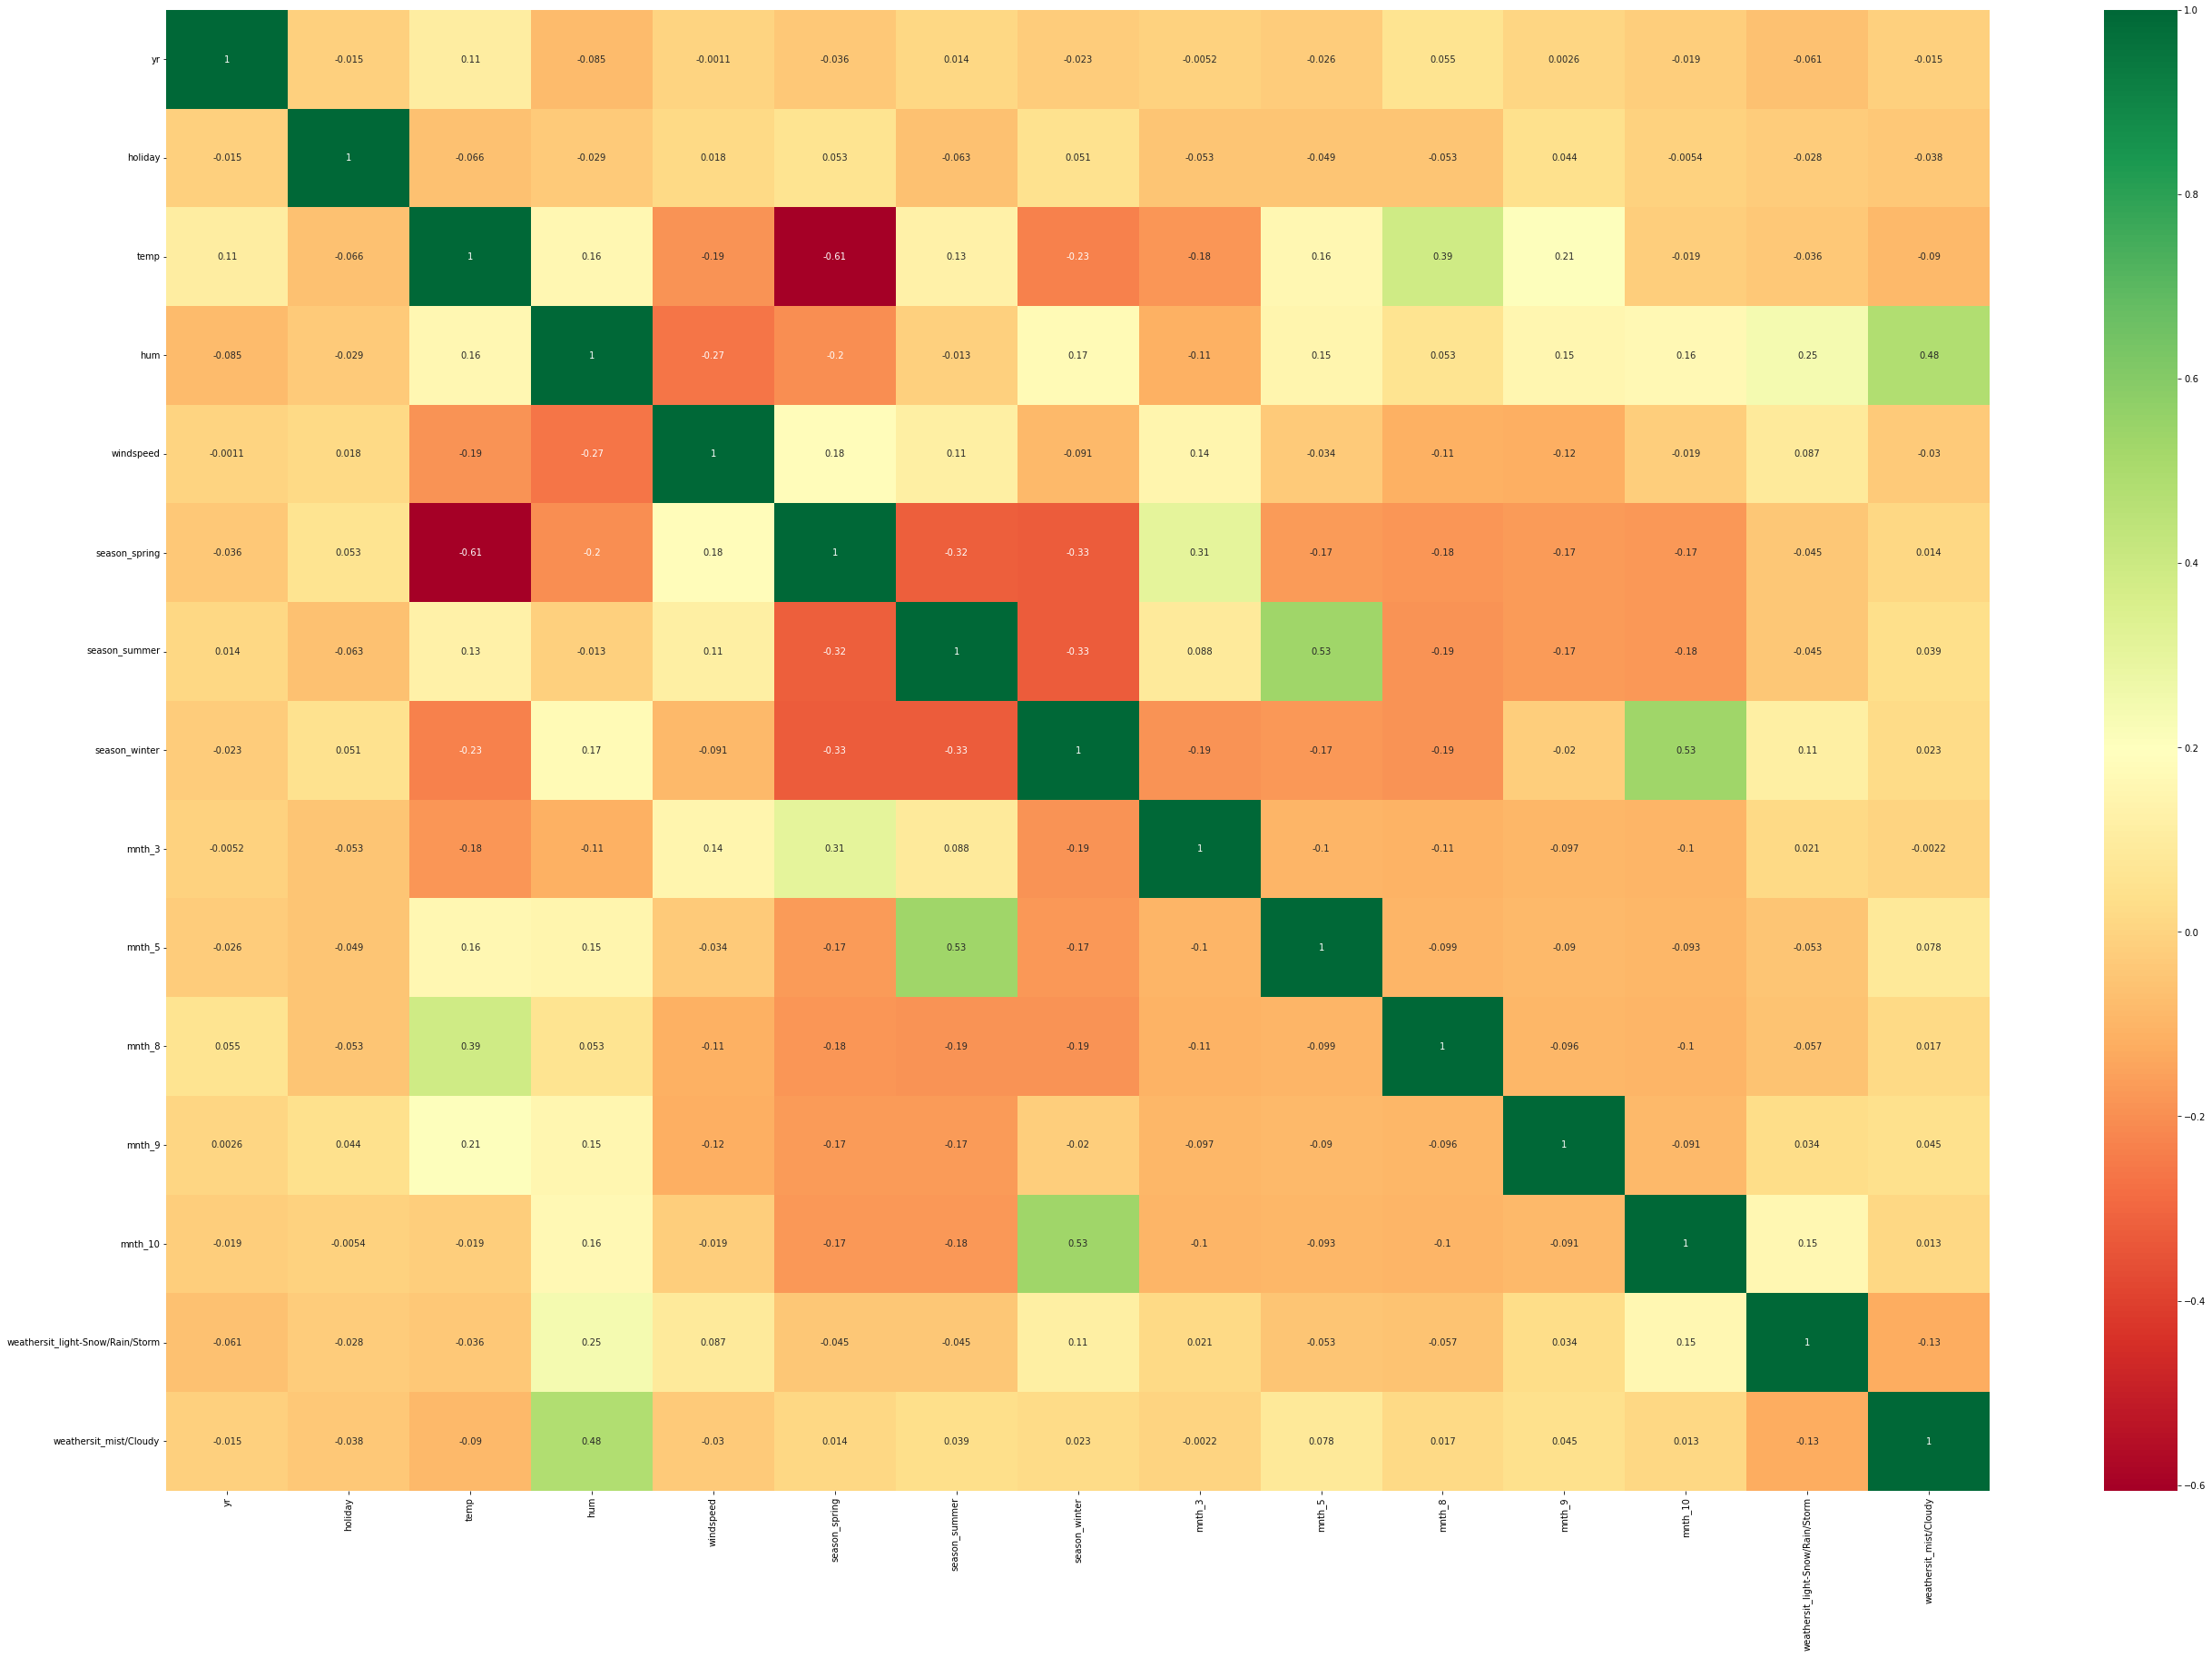

In [180]:
# checking the correlation among selected features
plt.figure(figsize=(45,30))
sns.heatmap(df_train[col].corr(),annot = True , cmap = 'RdYlGn')

let's drop mnth_5 as it  has  high p value.
mnth_5(may-end of spring and beginning of summer) is highly correlated with season_summer 

In [181]:
col = col.drop('mnth_5')

In [182]:
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_3', 'mnth_8', 'mnth_9',
       'mnth_10', 'weathersit_light-Snow/Rain/Storm',
       'weathersit_mist/Cloudy'],
      dtype='object')

In [183]:
# Building second model using rest of the variables
## Model_2
build_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          9.02e-190
Time:                        05:39:59   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [184]:
# looking at the VIF
get_vif(col)

                            Features    VIF
3                                hum  29.49
2                               temp  15.32
5                      season_spring   4.70
4                          windspeed   4.69
7                      season_winter   4.33
6                      season_summer   3.26
13            weathersit_mist/Cloudy   2.29
0                                 yr   2.09
9                             mnth_8   1.80
11                           mnth_10   1.61
10                            mnth_9   1.49
8                             mnth_3   1.29
12  weathersit_light-Snow/Rain/Storm   1.27
1                            holiday   1.05


- second model has a R squared value of 0.845 nearly same as our first model, so dropping of month-may hasn't affected much.
- season_spring is not significant in this model
- VIF values of hum and temp are way too high
- let's remove season_spring from our column as it is has a p value above 0.05

In [185]:
# removing column season_spring
col = col.drop('season_spring')

In [186]:
#building our third model
build_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          2.26e-190
Time:                        05:39:59   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [187]:
get_vif(col)

                            Features    VIF
3                                hum  14.75
2                               temp  10.01
4                          windspeed   3.69
6                      season_winter   2.34
12            weathersit_mist/Cloudy   2.14
0                                 yr   2.02
5                      season_summer   1.83
8                             mnth_8   1.61
10                           mnth_10   1.61
9                             mnth_9   1.34
7                             mnth_3   1.22
11  weathersit_light-Snow/Rain/Storm   1.18
1                            holiday   1.04


In [188]:
# R squared value of our new model is 0.844 which is nearly same as our second model.
# mnth_3 (march) is not significant in this model
# VIF values of temp and hum have reduced but still above the upper bound
# So let's remove column mnth_3

In [189]:
#removing column mnth_3 from variables
col = col.drop('mnth_3')

In [190]:
# Building our fourth model
build_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          6.02e-191
Time:                        05:39:59   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [191]:
get_vif(col)

                            Features    VIF
3                                hum  14.41
2                               temp   9.88
4                          windspeed   3.59
6                      season_winter   2.27
11            weathersit_mist/Cloudy   2.13
0                                 yr   2.02
5                      season_summer   1.83
9                            mnth_10   1.61
7                             mnth_8   1.60
8                             mnth_9   1.34
10  weathersit_light-Snow/Rain/Storm   1.18
1                            holiday   1.04


In [192]:
# R squared - 0.843 nearly same as third model
# All the variables in this model are significant
# hum and temp has higher VIF values
# So let's remove column hum from our selected variables

In [193]:
# removing hum from col
col = col.drop('hum')

In [194]:
# 5th model
build_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          3.21e-187
Time:                        05:39:59   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [195]:
get_vif(col)

                            Features   VIF
2                               temp  5.11
3                          windspeed  3.11
0                                 yr  2.00
5                      season_winter  1.95
4                      season_summer  1.82
8                            mnth_10  1.60
6                             mnth_8  1.59
10            weathersit_mist/Cloudy  1.49
7                             mnth_9  1.34
9   weathersit_light-Snow/Rain/Storm  1.09
1                            holiday  1.04


In [196]:
# R squared - 0.836
# mnth_10 is not significant in this model
# VIF value of temp has reduced but still above 5
# let's remove mnth_10 as its p value is above 0.05.

In [197]:
# dropping mnth_10
col = col.drop('mnth_10')

In [198]:
#6th model
build_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          1.26e-187
Time:                        05:40:00   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [199]:
get_vif(col)

                           Features   VIF
2                              temp  5.01
3                         windspeed  3.10
0                                yr  2.00
4                     season_summer  1.81
6                            mnth_8  1.58
5                     season_winter  1.49
9            weathersit_mist/Cloudy  1.48
7                            mnth_9  1.31
8  weathersit_light-Snow/Rain/Storm  1.08
1                           holiday  1.04


In [200]:
# Our sixth model has a R squared value of 0.834
# All the variables in this model are significant
# VIF value of temp is slightly above 5
# I do not want to remove temp  since we have seen that temp is highlt correlated with our target variable 'cnt'
# so let's see what causing high VIF value for temp,
#let's plot a heatmap again and see which variable is in high correlation with temp among the selected variables.


In [201]:
col

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_8', 'mnth_9', 'weathersit_light-Snow/Rain/Storm',
       'weathersit_mist/Cloudy'],
      dtype='object')

<AxesSubplot:>

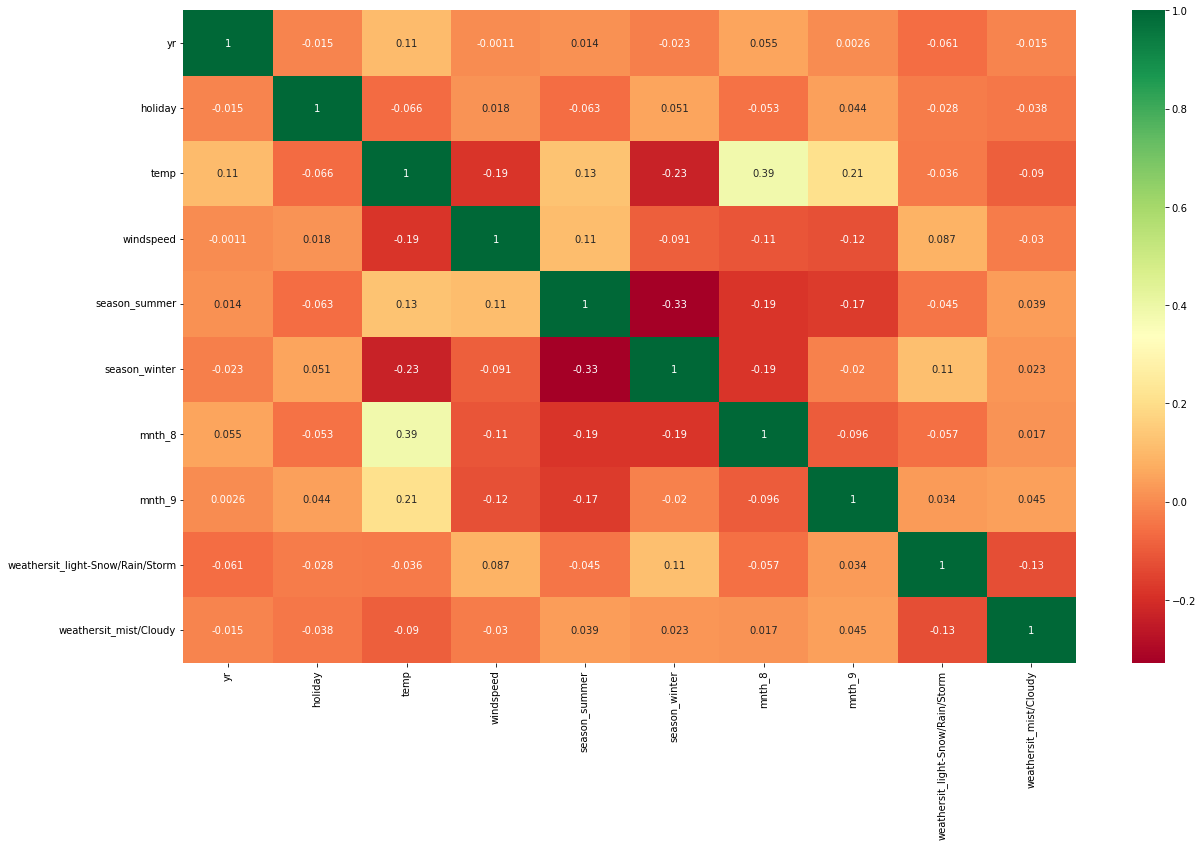

In [202]:
plt.figure(figsize=(20,12))
sns.heatmap(df_train[col].corr(),annot = True,cmap = 'RdYlGn')

In [203]:
# mnth_8 is highly correlated with temp
# let's remove mnth_8 to keep VIF values of features below 5

In [204]:
# removing mnth_8
col = col.drop('mnth_8')

In [205]:
# 7th model
build_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          1.37e-186
Time:                        05:40:01   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [206]:
get_vif(col)

                           Features   VIF
2                              temp  3.68
3                         windspeed  3.05
0                                yr  2.00
4                     season_summer  1.56
8            weathersit_mist/Cloudy  1.48
5                     season_winter  1.38
6                            mnth_9  1.20
7  weathersit_light-Snow/Rain/Storm  1.08
1                           holiday  1.03


In [207]:
# Our seventh model has a R squared value of 0.831
# 83% of the variation in our target variable 'cnt' can be explained by these 9 variables.
# Adj. R-squared:0.828
# All the variables in this model are significant
# All the features have VIF value below 4.
# So let's make this model as our final model

In [208]:
import statsmodels.api as sm

In [209]:
#### final model
X_train_sm = sm.add_constant(X_train[col])
lmf = sm.OLS(y_train, X_train_sm).fit()

In [210]:
# coefficients of features
lmf.params

const                               0.126436
yr                                  0.232786
holiday                            -0.099211
temp                                0.548046
windspeed                          -0.153276
season_summer                       0.086848
season_winter                       0.130574
mnth_9                              0.101076
weathersit_light-Snow/Rain/Storm   -0.283837
weathersit_mist/Cloudy             -0.079747
dtype: float64

- variables which positively affcet 'cnt' : 'yr', 'temp',  'season_summer', 'season_winter', 'mnth_9'
- variables which negatively affects 'cnt' : 'holiday','windspeed','weathersit_light-Snow/Rain/Storm','weathersit_mist/Cloudy'

## Residual Analysis of the train data

In [211]:
y_train_pred = lmf.predict(X_train_sm)

Text(0.5, 0, 'Errors')

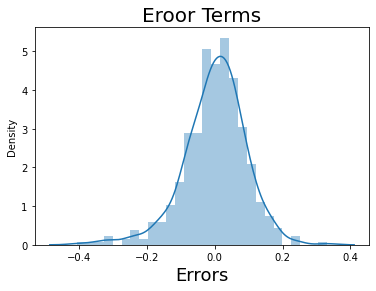

In [212]:
# residual plot
res = y_train-y_train_pred
sns.distplot(res)
plt.title('Eroor Terms',fontsize=20)    
plt.xlabel('Errors',fontsize=18)

In [213]:
# The distribution is centered around zero and approximately a normal distribution
# so our assumption of errors remain valid

## Making Predictions Using the Final Model

 R squared value for the training set is around 83%, now let's go ahead and check the value for testing data set.

In order to make meaningful predictions,whatever pre-processing steps we did  on training test has to be replicated on the test test
so we need to rescale the variables in the test set as well

In [214]:
#### Applying the scaling on the test sets

In [215]:
# numerical type columns (without binary/dummy variables)
non_bool = ['temp','hum','windspeed','cnt']

In [216]:
df_test[non_bool] = scaler.transform(df_test[non_bool])

In [217]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light-Snow/Rain/Storm,weathersit_mist/Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.073059,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.260830,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [218]:
#### Dividing  test dataset into X_test and y_test

In [219]:
y_test = df_test.pop('cnt')
X_test = df_test

In [220]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [221]:
X_test_m.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light-Snow/Rain/Storm,weathersit_mist/Cloudy
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,0,0,1,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,0,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,1,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,1,0,0,0
152,1.0,0,0,0,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [222]:
X_train_sm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_9', 'weathersit_light-Snow/Rain/Storm',
       'weathersit_mist/Cloudy'],
      dtype='object')

In [223]:
# from test set,let's store same features used for model building, into X_test_sm
X_test_sm = X_test_m[X_train_sm.columns]

In [224]:
# Making predictions
y_test_pred = lmf.predict(X_test_sm)

## Model Evaluation

In [225]:
from sklearn.metrics import r2_score

In [226]:
# let's check Regression score in case of test data
r2_score(y_test,y_test_pred)

0.7938290016640651

r2_score of train :  0.831
r2_score of test : 0.794
- The model is able to predict 83% of  the variation in target variable in our training test
- Model is able to predict 79% of the variation in traget variable in the test set.

In [227]:
# residual of test set
res2 = y_test-y_test_pred

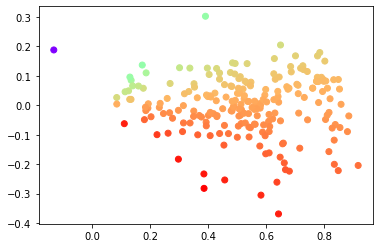

In [228]:
#### Pattern between Residuals and Predicted values (Test data)
plt.scatter(y_test_pred, res2,c= np.arctan2(y_test_pred,res2), cmap=plt.cm.rainbow ,alpha = 1)

 we don't see any pattern here, as expected from our model. 
 
 There is no specific relation between the predicted values and residuals

Text(0, 0.5, 'y_pred')

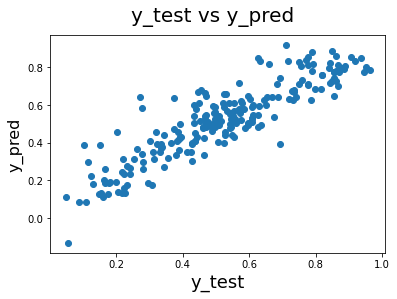

In [229]:
#Let's now plot the graph for actual versus predicted values.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)         

In [230]:
# we have a decent model
# model is able to predict well

In [231]:
lmf.params.sort_values(ascending= False)

temp                                0.548046
yr                                  0.232786
season_winter                       0.130574
const                               0.126436
mnth_9                              0.101076
season_summer                       0.086848
weathersit_mist/Cloudy             -0.079747
holiday                            -0.099211
windspeed                          -0.153276
weathersit_light-Snow/Rain/Storm   -0.283837
dtype: float64

#### Equation of our regression would be
cnt = 0.126436 + 0.548046*temp + 0.232786*yr + 0.130574*season_winter + 0.101076*mnth_9 + 0.086848*season_summer - 0.079747*weathersit_mist/Cloudy - 0.099211*holiday - 0.153276*windspeed - 0.283837*weathersit_light-Snow/Rain/Storm

#### Which variables are significant in predicting the demand for shared bikes.?
Following variables are good at predicting 'cnt'
- 'yr'
- 'holiday'
- 'temp'
- 'windspeed'
- 'season_summer'
- 'season_winter',
- 'mnth_9'
- 'weathersit_light-Snow/Rain/Storm'
- 'weathersit_mist/Cloudy'

#### How well those variables describe the bike demands?
providing variables and their coefficients in the model below (with one unit change in a variable,it can affect the target variable by its coefficient times, when other variables are kept constant)

In [232]:
#variables and their coefficients
# temp                                0.548046
# yr                                  0.232786
# season_winter                       0.130574
# mnth_9                              0.101076
# season_summer                       0.086848
# weathersit_mist/Cloudy             -0.079747
# holiday                            -0.099211
# windspeed                          -0.153276
# weathersit_light-Snow/Rain/Storm   -0.283837

# Interepretation of results

- Based on our final model the best fit eqation is
cnt = 0.126436 + (0.548046temp) + (0.232786yr) + (0.130574season_winter) + (0.101076mnth_9) + (0.086848season_summer) - (0.079747weathersit_mist/Cloudy) - (0.099211holiday) - (0.153276windspeed) - (0.283837*weathersit_light-Snow/Rain/Storm)

r2_score of train :  0.831
r2_score of test : 0.794
- The model is able to predict 83% of  the variation in target variable in our training test
- Model is able to predict 79% of the variation in traget variable in the test set.

- Top four predictors of the demand of rental bikes would be
1. temperature: <br>
    People tend to travel alot with increase in temperature.<br>
2. weathersit_light-Snow/Rain/Storm : <br>
    Under bad weather situation the demand for rental bikes is low.<br>
3. year (2018/2019) : <br>
    more people rented bike in 2019 comapred to 2018<br>
4. windspeed : <br>
    when windspeed is high people prefer not to travel/rent bikes<br>




Boombikes can increase their profits by

1. Marketing heavily in high temperature regions, as their rental count increases with temperature and also by making sure that many bikes are available during days with higher temperature.

2. During bad weather (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) people tend to use rental bikes less. So during this period Boombikes should focus on the maintenance of bikes.

3. Rental count is likely to decrease during Spring season. So  offering discounts  may enhance the numbers during Spring.

4. Rental count is increasing over years, so the company needs to make sure that they increase the supply of bikes every year.